DFS starting from vertex 2:
[2, 0, 1, 3, 4]


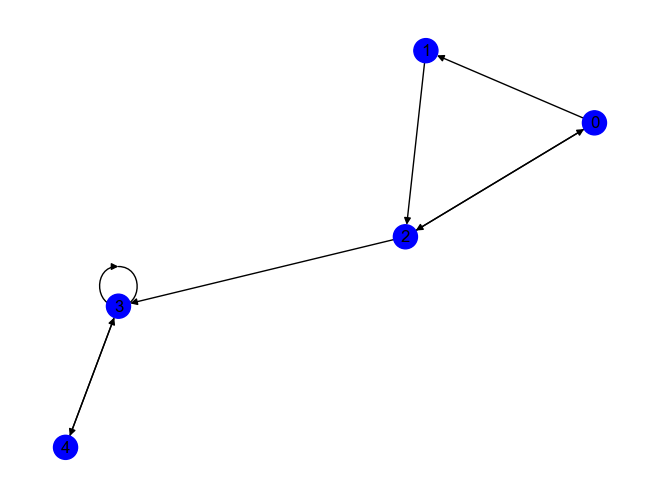

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append(v)

    def dfs(self, start):
        visited = set()
        dfs_order = []A

        def dfs_recursive(node):
            visited.add(node)
            dfs_order.append(node)
            for neighbor in self.graph.get(node, []):
                if neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return dfs_order

def visualize_dfs(graph, dfs_order):
    G = nx.DiGraph()
    for node, neighbors in graph.graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes()}

    node_colors = ['blue' if node in dfs_order else 'gray' for node in G.nodes()]

    nx.draw(G, pos, labels=labels, node_color=node_colors, with_labels=True, arrows=True)
    plt.show()

# Example usage:
g = Graph()
g.add_edge(0, 1) 
g.add_edge(0, 2) 
g.add_edge(1, 2) 
g.add_edge(2, 0) 
g.add_edge(2, 3) 
g.add_edge(3, 3)
g.add_edge(3, 4)
g.add_edge(4,3)

start_node = 2
dfs_order = g.dfs(start_node)
print("DFS starting from vertex 2:")
print(dfs_order)

visualize_dfs(g, dfs_order)


In [43]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
        
    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.visited=[]
        
    def BFS(self,s):
        queue = []
        queue.append(s)
        self.visited.append(s)
        while queue:
            s = queue.pop(0)
            print(s,end=" ")
            for i in self.graph[s]:
                if i not in self.visited:
                    queue.append(i)
                    self.visited.append(s)
                    
g = Graph()
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(2, 3) 
g.addEdge(3, 3) 
  
print ("Following is Breadth First Traversal"
                  " (starting from vertex 2)") 
g.BFS(2) 
  

Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 3 

BFS starting from vertex 2: [2, 1, 3]


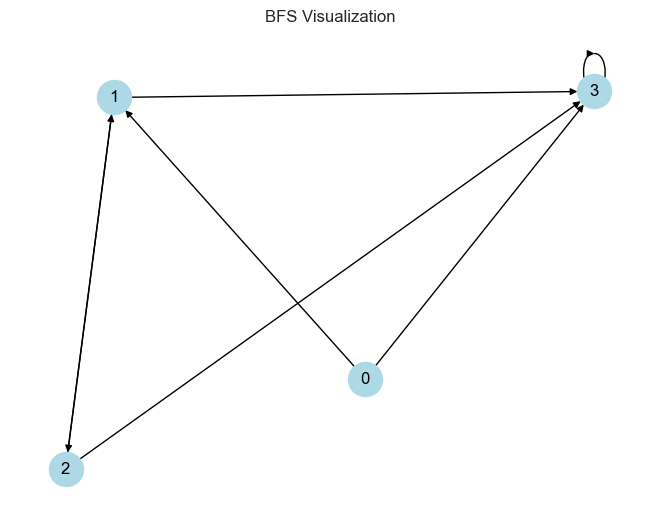

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

def bfs(graph, start_node):
    visited = set()
    queue = [start_node]
    visited.add(start_node)
    bfs_order = [start_node]

    while queue:
        node = queue.pop(0)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                bfs_order.append(neighbor)

    return bfs_order

G = nx.DiGraph()

G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(3, 3)

start_node = 2
bfs_order = bfs(G, start_node)
print("BFS starting from vertex 2:", bfs_order)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600)
plt.title("BFS Visualization")
plt.show()

In [7]:
import heapq

# Define the maze as an 8x8 matrix
maze = [
    ['S', ' ', ' ', 'X', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', ' ', ' ', 'X', 'X', ' '],
    [' ', 'X', 'X', 'X', ' ', 'X', ' ', 'X'],
    ['X', ' ', 'X', ' ', ' ', ' ', 'X', ' '],
    ['X', ' ', ' ', 'X', ' ', 'X', ' ', ' '],
    ['X', 'X', ' ', 'X', 'G', 'X', ' ', ' '],
    ['X', ' ', ' ', 'X', ' ', 'X', 'X', 'X'],
    ['X', 'X', 'X', 'X', ' ', ' ', ' ', 'X']
]

# Define possible movements (up, down, left, right)
movements = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def heuristic(node, goal):
    # Manhattan distance heuristic
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def astar_search(maze, start, goal):
    open_set = []
    closed_set = set()

    heapq.heappush(open_set, (0, start, []))  # Priority queue: (f-value, current node, path)

    while open_set:
        _, current, path = heapq.heappop(open_set)

        if current == goal:
            return path + [current]

        if current in closed_set:
            continue

        closed_set.add(current)

        for dx, dy in movements:
            x, y = current
            neighbor = (x + dx, y + dy)

            if (
                0 <= neighbor[0] < len(maze) and
                0 <= neighbor[1] < len(maze[0]) and
                maze[neighbor[0]][neighbor[1]] != 'X'
            ):
                g = len(path) + 1
                h = heuristic(neighbor, goal)
                f = g + h
                heapq.heappush(open_set, (f, neighbor, path + [current]))

    return None  # No path found

start = (0, 0)
goal = (5, 4)

path = astar_search(maze, start, goal)

if path:
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if (row, col) == start:
                print('S', end=' ')
            elif (row, col) == goal:
                print('G', end=' ')
            elif (row, col) in path:
                print('P', end=' ')  # Path
            else:
                print(maze[row][col], end=' ')
        print()
else:
    print("No path found!")


S P P X   X     
X X P P P X X   
  X X X P X   X 
X   X   P   X   
X     X P X     
X X   X G X     
X     X   X X X 
X X X X       X 


Confusion Matrix for Test Data:
[[124  19]
 [ 32  56]]
Accuracy Score for Test Data: 0.7792207792207793
Accuracy Score for Training Data: 0.7635009310986964


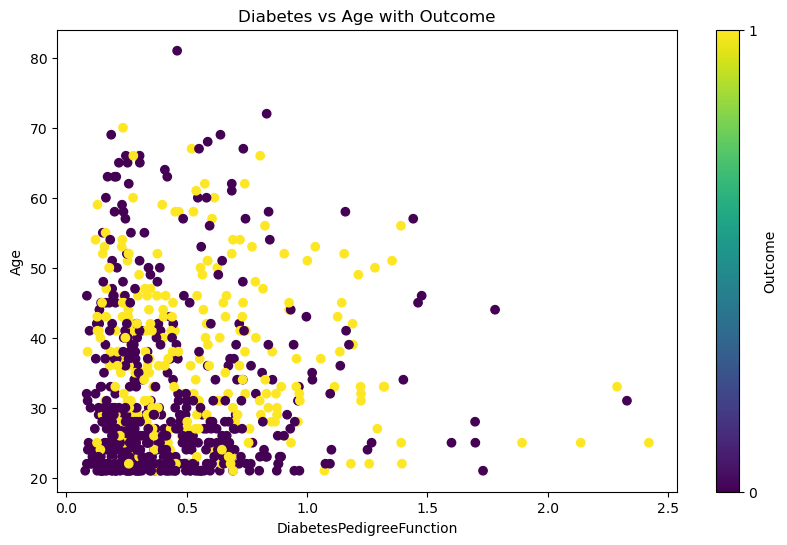

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('diabetes.csv')

df.isna().sum()

# sns.heatmap(df.corr(method='kendall'), annot=True)
# plt.show()

X = df.drop(columns=['Outcome'])
y = df['Outcome']

xtr, xts, ytr, yts = train_test_split(X, y, train_size=.7, random_state=123)

sc = StandardScaler()
sc_obj = sc.fit(xtr)

sctr, scts = sc_obj.transform(xtr), sc_obj.transform(xts)

clsfr = GaussianNB()
clsfr.fit(sctr, ytr)

y_prd_ts = clsfr.predict(scts)
y_prd_tr = clsfr.predict(sctr)

conf_matrix_ts = confusion_matrix(yts, y_prd_ts)
print("Confusion Matrix for Test Data:")
print(conf_matrix_ts)

acc_score_ts = accuracy_score(yts, y_prd_ts)
print(f"Accuracy Score for Test Data: {acc_score_ts}")

acc_score_tr = accuracy_score(ytr, y_prd_tr)
print(f"Accuracy Score for Training Data: {acc_score_tr}")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'], c=df['Outcome'], cmap='viridis')
plt.colorbar(label='Outcome', ticks=[0, 1])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Age')
plt.title('Diabetes vs Age with Outcome')
plt.show()


In [17]:
!pip3 install pgmpy

ERROR: Could not find a version that satisfies the requirement pgmpy (from versions: none)
ERROR: No matching distribution found for pgmpy


In [16]:
import pandas as pd
import numpy as np
import csv

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

heart_df = pd.read_csv('heart.csv')
heart_df = heart_df.replace('?',np.nan)

heart_df.columns

model = BayesianNetwork([('age','target'),('sex','target'),('exang','target'),('cp','target'),
                ('target','restecg'),('target','chol')])

model.fit(heart_df,estimator = MaximumLikelihoodEstimator)

heart_disease_infer = VariableElimination(model)

print('\n 1. Probability of Heart Disease given evidence = restecg')
q1 = heart_disease_infer.query(variables = ['target'],evidence={'restecg':1})
print(q1)

print('\n 2. Probability of Heart Disease given evidence = cp')
q2 = heart_disease_infer.query(variables = ['target'],evidence={'cp':2})
print(q2)

for c in heart_df:
    print(c)
    print(heart_df[c].value_counts())
    
    

ModuleNotFoundError: No module named 'pgmpy'

-0.9029910753072274
3


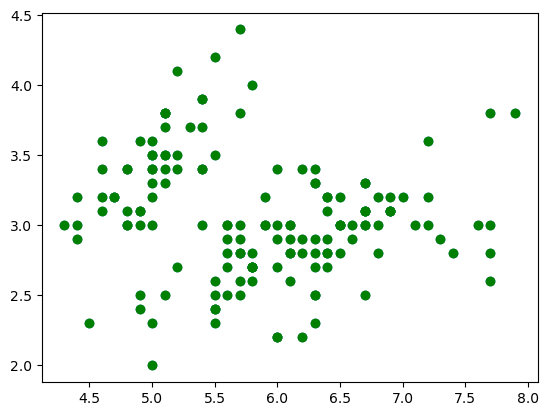

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
iris = datasets.load_iris()
X =iris.data[:,:2]
d = pd.DataFrame(X)
plt.scatter(d[0],d[1])
gmm = GaussianMixture(n_components=3)
gmm.fit(iris.data[:,2:])
labels = gmm.predict(d)
d['labels'] = labels
d0 = d[d['labels']==0]
d1 = d[d['labels']==1]
d2 = d[d['labels']==2]
plt.scatter(d0[0],d0[1],c='red')
plt.scatter(d1[0],d1[1],c='yellow')
plt.scatter(d2[0],d2[1],c='green')
print(gmm.lower_bound_)
print(gmm.n_iter_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

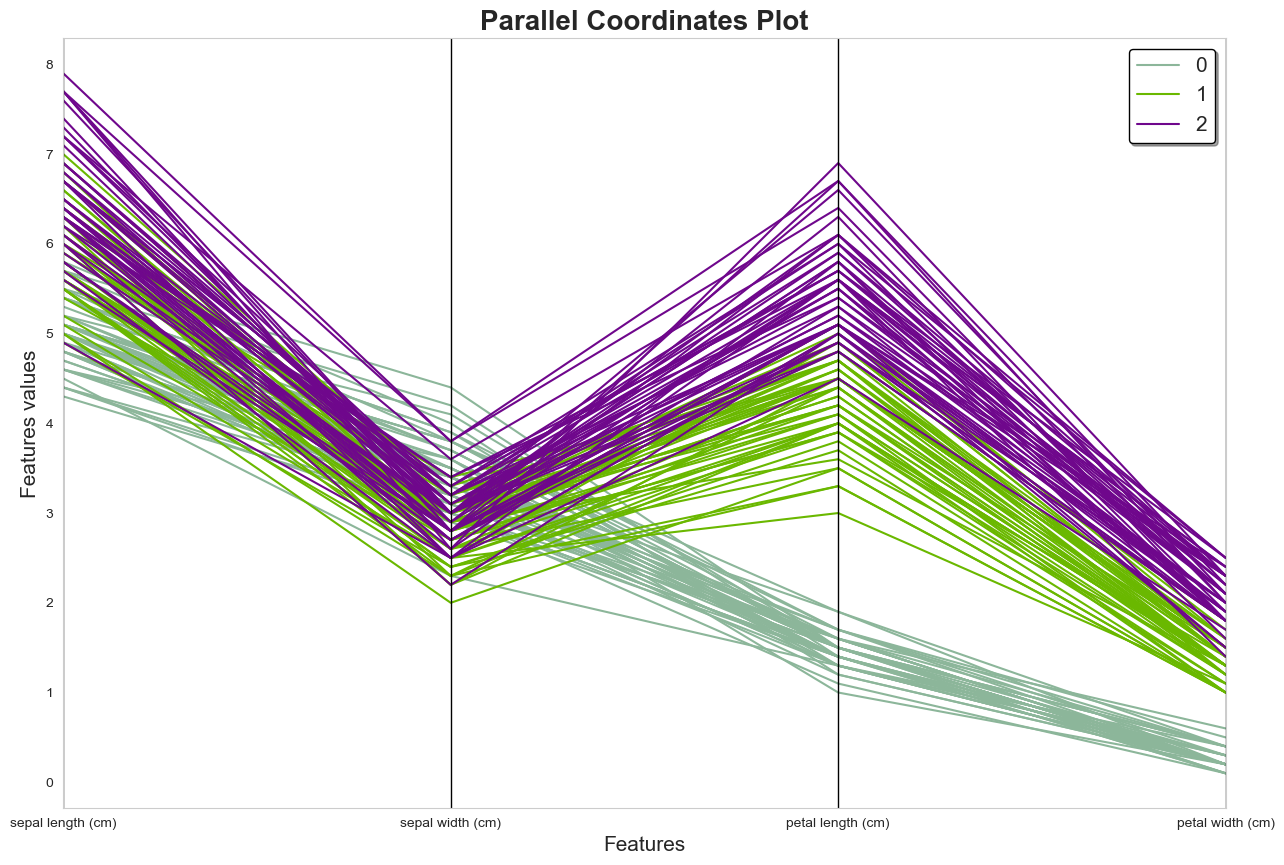

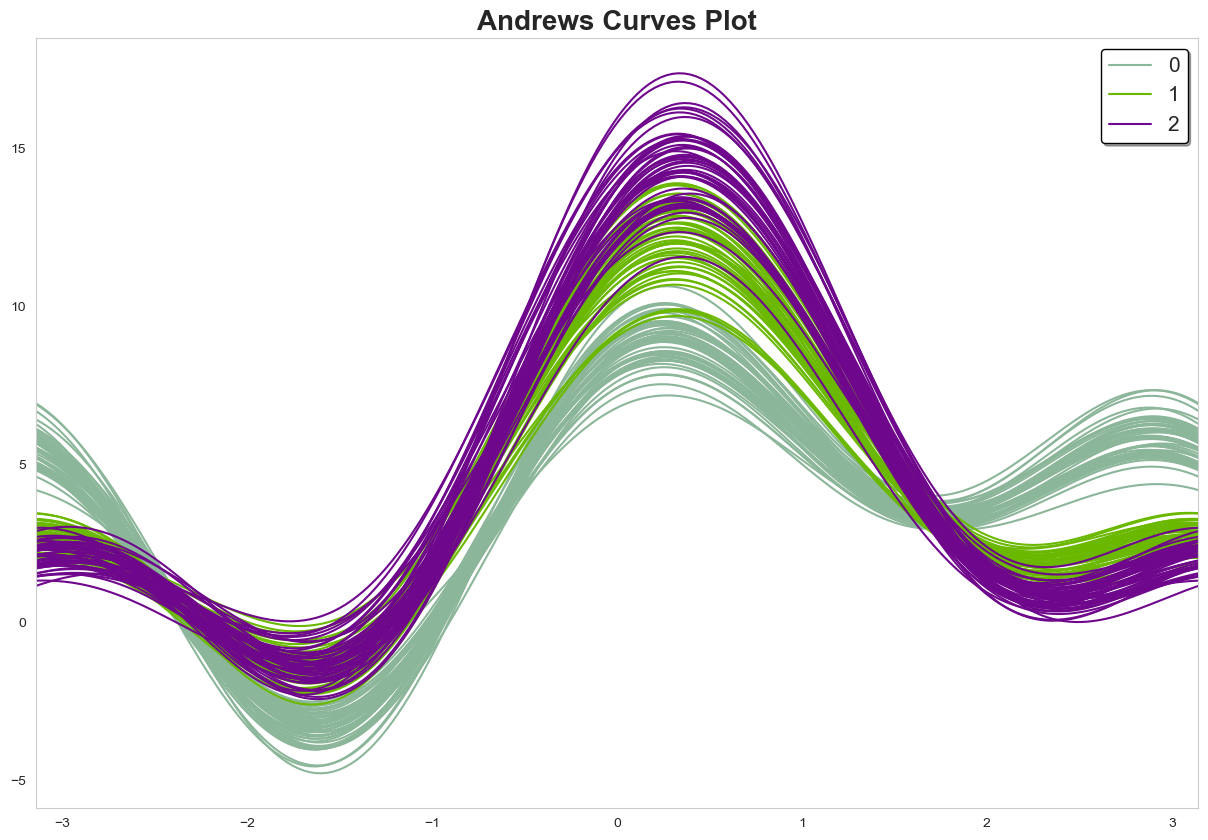

<Figure size 640x480 with 0 Axes>

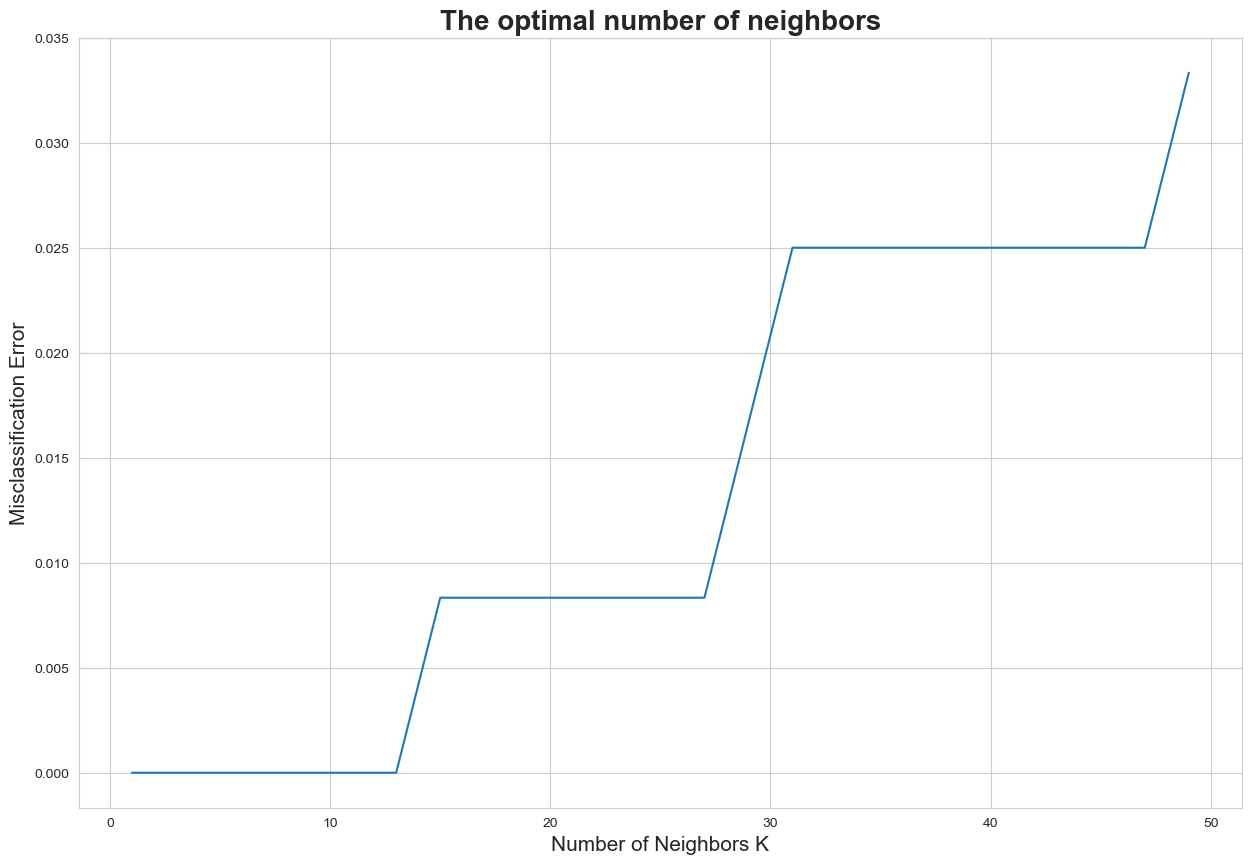

In [30]:
import numpy as np
import pandas as pd

from sklearn import datasets
iris = datasets.load_iris()

x,y = pd.DataFrame(iris['data'],columns=iris['feature_names']),pd.DataFrame(iris['target'],columns=['target'])

dataset = x
dataset['target'] = y


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


classifier = KNeighborsClassifier(n_neighbors=3)


classifier.fit(xtr, ytr)


y_pred = classifier.predict(xts)

cm = confusion_matrix(yts, y_pred)

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xtr, ytr, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset, "target")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x, y, test_size = 0.2, random_state = 0)

from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset, "target")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()
    
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()



In [29]:
!pip install pyplotplus

ERROR: Could not find a version that satisfies the requirement pyplotplus (from versions: none)
ERROR: No matching distribution found for pyplotplus


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from six import StringIO
from IPython.display import Image
import pydot
import os
import matplotlib.pyplot as plt

# Read and print the training dataset
traindatainput = pd.read_csv('monks2_train.csv', delimiter=",")
print("Training Dataset")
print(traindatainput)

# Read and print the test dataset
testdatainput = pd.read_csv('monks2_test.csv', delimiter=",")
print("Test Dataset")
print(testdatainput)

# Define the feature columns and target column
X_train = traindatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_train = traindatainput["LABEL"]
X_test = testdatainput[['AA', 'A2', 'A3', 'A4', 'A5', 'A6']].values
Y_test = testdatainput["LABEL"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=3)

# Create a Decision Tree with criterion 'entropy' and max_depth 4
monksTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
monksTree.fit(X_train, Y_train)
predicted = monksTree.predict(X_test)
print("Predicted Labels:")
print(predicted)

# Find and print the accuracy of the decision tree model
accuracy = accuracy_score(Y_test, predicted)
print("Decision Tree's Accuracy:", accuracy)

# Visualize the decision tree using Graphviz
dot_data = StringIO()
export_graphviz(monksTree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=['al', 'a2', 'a3', 'a4', 'a5', 'a6'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

# Try different criteria and check accuracy
monksTree = DecisionTreeClassifier(criterion='gini')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_gini = accuracy_score(Y_test, pred)
print('Criterion=gini, Accuracy:', accuracy_gini)

monksTree = DecisionTreeClassifier(criterion='entropy')
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_entropy = accuracy_score(Y_test, pred)
print('Criterion=entropy, Accuracy:', accuracy_entropy)

# Check if pruning can improve results
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1, 30):
    monksTree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, pred))

    monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    monksTree.fit(X_train, Y_train)
    pred = monksTree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))

    max_depth.append(i)

d = pd.DataFrame({'acc_gini': pd.Series(acc_gini), 'acc_entropy': pd.Series(acc_entropy), 'max_depth': pd.Series(max_depth)})

# Visualize changes in parameters
plt.plot('max_depth', 'acc_gini', data=d, label='gini')
plt.plot('max_depth', 'acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Check accuracy with a shorter tree (max depth of 7) and criterion of entropy
monksTree = DecisionTreeClassifier(criterion='entropy', max_depth=7)
monksTree.fit(X_train, Y_train)
pred = monksTree.predict(X_test)
accuracy_pruned = accuracy_score(Y_test, pred)
print("Accuracy after reducing depth and using Entropy:", accuracy_pruned)

ModuleNotFoundError: No module named 'pydot'

In [32]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('blood-transf.csv')
data = data.sample(frac=1).reset_index(drop=True)

# Define X and Y
X = np.array(data)[:, 1:-1]
Y = np.array(data)[:, -1]

# One-hot encode Y
one_hot_encoder = OneHotEncoder(sparse=False)
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Define the neural network architecture
layers = [len(X[0]), 11, 8, 5, 5, len(Y[0])]
learning_rate = 0.1
epochs = 500

# Train the neural network
weights = NeuralNetwork(X_train, Y_train, X_test, Y_test, epochs=epochs, nodes=layers, lr=learning_rate)

# Print the final weights
print("Final weights:\n", weights)

# Test the model and print the accuracy
accuracy = Accuracy(X_test, Y_test, weights, display=True)
print("Testing Accuracy: {}".format(accuracy))

# Predict and evaluate
Y_result = [Predict(x, weights) for x in X_test]
Y_test = Y_test.tolist()
Y_result = [list(map(int, y)) for y in Y_result]

r2_score = sklearn.metrics.r2_score(Y_test, Y_result)
print("R2 score: {}".format(r2_score))

# Print the classification report
print(sklearn.metrics.classification_report(Y_test, Y_result))

# Compute and plot the ROC curve
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, Y_result)
plot_roc_curve(fpr, tpr)


NameError: name 'NeuralNetwork' is not defined

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('breast_cancer.csv')

In [36]:
target = df['diagnosis']

In [37]:
s = set()
for val in target:
    s.add(val)
s = list(s)

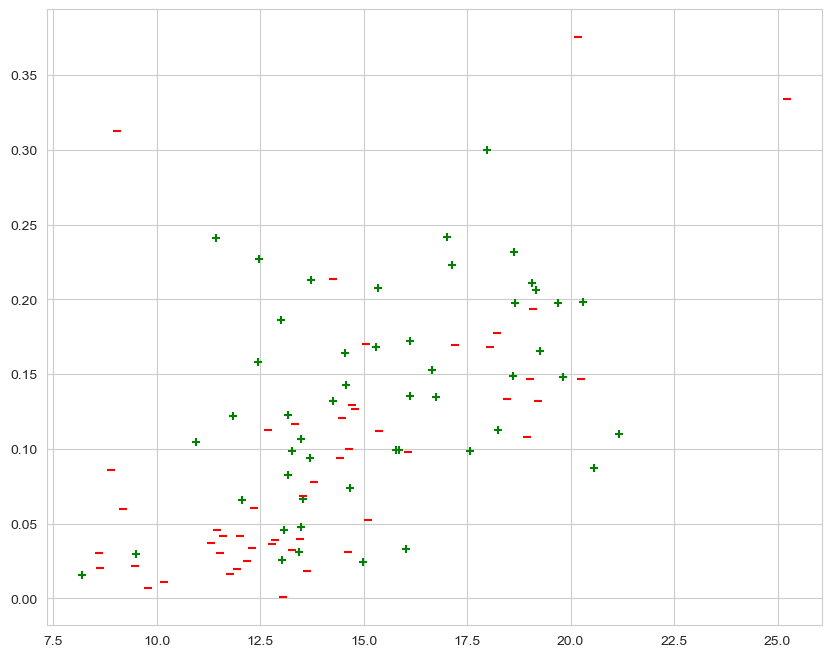

In [38]:
x = df['radius_mean']
y = df['concavity_mean']
open_x = x[:50]
open_y = y[:50]
high_x = x[50:100]
high_y = y[50:100]
plt.figure(figsize=(10,8))
plt.scatter(open_x,open_y,marker='+',color='green')
plt.scatter(high_x,high_y,marker='_',color='red')
plt.show()

Ex-13: Logical Regression

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

xtr,xts,ytr,yts = train_test_split(x,y,train_size=0.7)

sc = StandardScaler()
sc.fit(xtr)
sctr = sc.transform(xtr)
scts = sc.transform(xts)

model = LogisticRegression()
model.fit(sctr,ytr)

y_prd_ts = model.predict(scts)
y_prd_tr = model.predict(sctr)

accuracy_score(yts,y_prd_ts)

accuracy_score(ytr,y_prd_tr)

0.7839851024208566